In [75]:
#Aquiagregamos todas las librerias
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation


In [13]:
# Algoritmo Gradient Evolution (GE)
def gradient_evolution(objective_function, dim, bounds, num_individuals, max_iter, c1, Jr, Sr, epsilon):
    # Paso 1: Inicialización
    PopHist=[]
    population = np.random.uniform(bounds[0], bounds[1], (num_individuals, dim))
    fitness = np.array([objective_function(ind) for ind in population])
    best_index = np.argmin(fitness)
    global_best = population[best_index].copy()
    global_best_fitness = fitness[best_index]
    updating_history = np.ones(num_individuals)
    c=np.linspace(c1[0],c1[1] , max_iter)
    # Iteraciones del algoritmo
    for iteration in range(max_iter):
        new_population = population.copy()
        PopHist.append(new_population)

        for i in range(num_individuals):
            # Identificar los mejores y peores individuos
            best_neighbor = population[np.argmin(fitness)]
            worst_neighbor = population[np.argmax(fitness)]

            # Actualización de vectores 
            #Calculo del gradiante 
            if np.array_equal(population[i], global_best):  # Si es el mejor
                delta = c[iteration] + (np.abs(worst_neighbor - population[i])) / 2
                bj = population[i] - delta
                new_population[i] = population[i]-(np.random.uniform(0, 1, dim)*(delta/2))*((worst_neighbor - bj)/(worst_neighbor-population[i]+ bj))+np.random.uniform(0, 1, dim) * (global_best-population[i])
            elif np.array_equal(population[i], worst_neighbor):  # Si es el peor
                delta = c[iteration] + (np.abs(population[i]-best_neighbor )) / 2
                wj = population[i] + delta
                new_population[i] =population[i]-(np.random.uniform(0, 1, dim)*(delta/2))*((wj-best_neighbor)/(wj-population[i]+ best_neighbor))+np.random.uniform(0, 1, dim) * (global_best-population[i])
            else:  # Otros individuos
                delta = np.abs(population[i] - best_neighbor) / 2 + np.abs(worst_neighbor - population[i]) / 2
                new_population[i] = population[i] - (np.random.uniform(0, 1, dim)*(delta/2))*((worst_neighbor-best_neighbor)/(worst_neighbor-population[i]+ best_neighbor))+np.random.uniform(0, 1, dim)*(global_best-population[i])

            # Vector Jumping
            if np.random.rand() < Jr:
                new_population[i] = new_population[i]+np.random.normal(0, 1, dim) * (new_population[i] - population[i])

            # Calcular aptitud
            new_fitness = objective_function(new_population[i])

            # Vector Refreshing
            if new_fitness < fitness[i]:
                fitness[i] = new_fitness
                population[i] = new_population[i]
            else:
                updating_history[i] -= epsilon * updating_history[i]
                if updating_history[i] < Sr:
                    population[i] = np.random.uniform(bounds[0], bounds[1], dim)
                    fitness[i] = objective_function(population[i])
                    updating_history[i] = 1

        # Actualizar el mejor vector global
        best_index = np.argmin(fitness)
        if fitness[best_index] < global_best_fitness:
            global_best = population[best_index].copy()
            global_best_fitness = fitness[best_index]

        # Imprimir progreso
        #print(f"Iteración {iteration + 1}/{max_iter}, Mejor Fitness: {global_best_fitness}")

    return global_best, global_best_fitness, PopHist

1ero (meter las curvas de nivel para ver la dinamica)
Rosenbrock 2D ver la evoluciòn del metodo
Tintar las curvas de nivel y observar como los puntos iniciales se acercan de a a poco la soluciòn
Generar un mapa de contornos (curvas de nivel) y graficar los puntos conforme evoluciona el algoritmo
Cada 10 iteraciones pintar

Elegir el vector de manera aleatoria

Poner las restricciones de caja, si pasa eso truncarlo 
Formular de manera vectorialen el punto que el vector atraviesa las paredes de la caja, verificar para todas las componentes las condiciones de caja.

Primero meter las curvas de nivel para observar el comportamiento

Gradiante estocastico, que tanto avanzo en esa direcciòn es un parametro aleatorio, buscar código de gradiante estocastico
Experimento. hay que hacer varios pasos para que el metodo evolucione, hacer hibrido para tener un mejor paso parRA Ge

PROGRAMAR gradiante esticastico para ver como evoluciona


prOGRAMAR EL GRADIENTE ESTOCASTICO 
C de $[0,0]$


In [8]:
#En este modulo se insertan todasla funciones para testear que aparecen en tabla 1 de 
#The gradient evolution algorithm: A new metaheuristic
def Sphere(x):
    return sum([xi**2 for xi in x])
def WeightedSphere(x):
    return sum([(i+1)*xi**2 for i, xi in enumerate(x)])
def SumOfDifferentPower(x):
    return sum([abs(xi) ** (i + 1) for i, xi in enumerate(x)])
def StepFunction (x):
    return sum([math.floor(xi+0.5)**2 for xi in x])
def Schwefel1_2(x):
    sum_j = 0
    for i in range(1, len(x) + 1):
        sum_i = sum(x[:i])#Suma hasta el elemento i
        sum_j += sum_i**2
    return sum_j
def Schwefel2_2(x):
    return sum([abs(xi) for xi in x])+np.prod([abs(xi) for xi in x])
def rosenbrock(x):
    sum_i = 0
    #Se toma D-1 para que la función pueda quedar dentro de los limites del indice
    for i in range(len(x) - 1):
        sum_i += (x[i] - 1)**2 + 100 * (x[i+1] - x[i]**2)**2
    return sum_i
def easom(x):
    return -((-1)**len(x)) * np.prod(np.cos(x)**2)*np.exp(-np.sum((x - np.pi)**2))
def ackley(x):
    D = len(x)
    suma_cuadrados = sum([xi**2 for xi in x])
    suma_cosenos=sum([np.cos(2 * np.pi * xi) for xi in x])
    term1 = -20 * np.exp(-0.2 * np.sqrt(suma_cuadrados / D))
    term2 = -np.exp(suma_cosenos / D)
    return term1 + term2 + 20 + np.exp(1)
def griewank(x):
    suma_cuadrados = sum([xi**2 for xi in x])
    producto_cosenos = np.prod([np.cos(xi / np.sqrt(i+1)) for i, xi in enumerate(x)])
    return 1/4000*suma_cuadrados-producto_cosenos+1
def rastrigin(x):
    return sum([(xi**2 - 10 * np.cos(2 * np.pi * xi))+10 for xi in x])
def salomon(x):
    suma_cuadrados = sum([xi**2 for xi in x])
    return - np.cos(2 * np.pi * np.sqrt(suma_cuadrados)) + 0.1 * np.sqrt(suma_cuadrados)+1
def schwefel_2_3(x):
    return 418.9892*len(x)*sum([-xi*np.sin(np.sqrt(abs(xi))) for xi in x]) 
def Whitley(x):
    D = len(x)
    total_sum = 0
    for i in range(D):
        for j in range(D):
            y_ij = 100 * (x[j] - x[i]**2)**2 + (1 - x[j])**2
            total_sum += (y_ij**2 / 4000 - np.cos(y_ij) + 1)**2
    return total_sum
def f(x):
    alpha=1/8
    D=len(x)
    # Norma euclidiana al cuadrado
    norm_x_squared = np.sum(x**2)
    
    # Primera parte: [(||x||_2^2 - n)^2]^alpha
    term1 = ((norm_x_squared - D)**2)**alpha
    
    # Segunda parte: 1/n * (1/2 * ||x||_2^2 + sum(x))
    term2 = (1 / n) * (0.5 * norm_x_squared + np.sum(x))
    
    # Constante final
    term3 = 0.5
    
    # Suma de todos los términos
    return term1 + term2 + term3

In [9]:

# Parámetros del algoritmo
dim = 10  # Dimensiones del problema
bounds = (-100, 100)  # Límites del espacio de búsqueda
num_individuals = 20  # Tamaño de la población
max_iter = 3000  # Número de iteraciones
c = [0.00, 0.0] # Parámetro de ajuste, en caso de buscarlo fijo colocar el mismo valor en ambos parametros, para mejor resultado en orden descendiente 
Jr = 0.5  # Probabilidad de salto vectorial
Sr = 0.1  # Umbral de refresco
epsilon = 0.05  # Factor de reducción de historia

# Ejecutar el algoritmo GE para esfera
best_position, best_fitness = gradient_evolution(
    Sphere, dim, bounds, num_individuals, max_iter, c, Jr, Sr, epsilon
)
# Resultados
print("Mejor posición encontrada para Sphere:", best_position)
print("Fitness de la mejor posición para Sphere:", best_fitness)
# Ejecutar el algoritmo GE para rastrigin
best_position, best_fitness, PopHist = gradient_evolution(
    rastrigin, dim, bounds, num_individuals, max_iter, c, Jr, Sr, epsilon
)
# Resultados
print("Mejor posición encontrada para rastrigin:", best_position)
print("Fitness de la mejor posición para rastrigin:", best_fitness)

Mejor posición encontrada para Sphere: [ 1.17782701e-03 -1.11063124e-03  6.95465808e-04 -2.13851191e-03
  4.37668247e-05  2.17827853e-04 -1.47711494e-03 -1.95652362e-03
 -4.51570457e-04 -8.73433467e-04]
Fitness de la mejor posición para Sphere: 1.4703703708962494e-05
Mejor posición encontrada para rastrigin: [-1.01035017e+00  9.03679595e-01 -2.04359246e+00 -2.03381986e+00
 -1.10073401e+00  2.07702553e-03 -9.49646306e-01 -3.91312196e+00
 -8.40972881e-03 -7.84130682e-02]
Fitness de la mejor posición para rastrigin: 35.06800536359558


Mejor posición encontrada para Sphere: [ 0.00397331  0.00116543 -0.02518634  0.0029656  -0.00535278 -0.02090823
 -0.02502148 -0.00841617 -0.00747884 -0.02324383]
Fitness de la mejor posición para Sphere: 0.002419212962233628
Mejor posición encontrada para rastrigin: [-0.14393253 -0.14065743 -0.97147691 -1.01397408 -0.93133322 -2.03687773
 -0.83474696 -1.95773994 -1.0063868  -0.01248395]
Fitness de la mejor posición para rastrigin: 26.7417422963569

In [10]:
# Parámetros del algoritmo
dim = 10  # Dimensiones del problema
bounds = (-100, 100)  # Límites del espacio de búsqueda
num_individuals = 20  # Tamaño de la población
max_iter = 3000  # Número de iteraciones
c = [0.8,0.3]  # Parámetro de ajuste, en caso de buscarlo fijo colocar el mismo valor en ambos parametros, para mejor resultado en orden descendiente 
Jr = 0.5  # Probabilidad de salto vectorial
Sr = 0.1  # Umbral de refresco
epsilon = 0.05  # Factor de reducción de historia

# Ejecutar el algoritmo GE para WeightedSphere
best_position, best_fitness, PopHist = gradient_evolution(
    WeightedSphere, dim, bounds, num_individuals, max_iter, c, Jr, Sr, epsilon
)
# Resultados
print("Mejor posición encontrada para 2 WeightedSphere:", best_position)
print("Fitness de la mejor posición para 2 WeightedSphere:", best_fitness)
# Ejecutar el algoritmo GE para Schwefel1_2
best_position, best_fitness, PopHist = gradient_evolution(
    Schwefel1_2, dim, bounds, num_individuals, max_iter, c, Jr, Sr, epsilon
)
# Resultados
print("Mejor posición encontrada para 5 Schwefel1_2:", best_position)
print("Fitness de la mejor posición para 5 Schwefel1_2:", best_fitness)


# Ejecutar el algoritmo GE para salomon
best_position, best_fitness, PopHist = gradient_evolution(
    salomon, dim, bounds, num_individuals, max_iter, c, Jr, Sr, epsilon
)
# Resultados
print("Mejor posición encontrada para 12 salomon:", best_position)
print("Fitness de la mejor posición para 12 salomon:", best_fitness)

# Ejecutar el algoritmo GE para easom
bounds = (-np.pi, np.pi)
best_position, best_fitness, PopHist = gradient_evolution(
    easom, dim, bounds, num_individuals, max_iter, c, Jr, Sr, epsilon
)
# Resultados
print("Mejor posición encontrada para 8 easom:", best_position)
print("Fitness de la mejor posición para 8 easom:", best_fitness)

Mejor posición encontrada para 2 WeightedSphere: [-0.06032446  0.01427997 -0.00868414 -0.03119485 -0.02215228 -0.0337733
 -0.01825243 -0.0154233  -0.03518875 -0.01141329]
Fitness de la mejor posición para 2 WeightedSphere: 0.03414497415335258
Mejor posición encontrada para 5 Schwefel1_2: [-0.22673688  0.50219405 -0.34697848 -0.13076968  0.42907929 -0.20549278
 -0.0520477   0.17255287 -0.07855754 -0.14797385]
Fitness de la mejor posición para 5 Schwefel1_2: 0.2574417606779522
Mejor posición encontrada para 12 salomon: [-0.85671363 -0.52624563 -1.33872754 -2.63220274 -1.26733869 -0.88533663
 -1.57418388 -2.67882727 -1.24032302  1.29082157]
Fitness de la mejor posición para 12 salomon: 0.4998796756868358
Mejor posición encontrada para 8 easom: [3.14162462 3.14161807 3.14164989 3.1416077  3.14161477 3.14162742
 3.14163423 3.14162262 3.14162898 3.14156103]
Fitness de la mejor posición para 8 easom: -0.9999999763729756


Ejemplificaciòn mediante curvas de nivel.

In [102]:

# Parámetros del algoritmo
dim = 2  # Dimensiones del problema
bounds = (-30, 30)  # Límites del espacio de búsqueda
num_individuals = 10  # Tamaño de la población
max_iter = 1000  # Número de iteraciones
c = [0.01, 0.0] # Parámetro de ajuste, en caso de buscarlo fijo colocar el mismo valor en ambos parametros, para mejor resultado en orden descendiente 
Jr = 0.5  # Probabilidad de salto vectorial
Sr = 0.1  # Umbral de refresco
epsilon = 0.05  # Factor de reducción de historia

# Ejecutar el algoritmo GE para rosenbrock
best_position, best_fitness, PopHist = gradient_evolution(
    rosenbrock, dim, bounds, num_individuals, max_iter, c, Jr, Sr, epsilon
)
# Resultados
print("Mejor posición encontrada para rosenbrock:", best_position)
print("Fitness de la mejor posición para rosenbrock:", best_fitness)

Mejor posición encontrada para rosenbrock: [1.00250044 1.00495693]
Fitness de la mejor posición para rosenbrock: 6.504320486675629e-06


MovieWriter imagemagick unavailable; using Pillow instead.


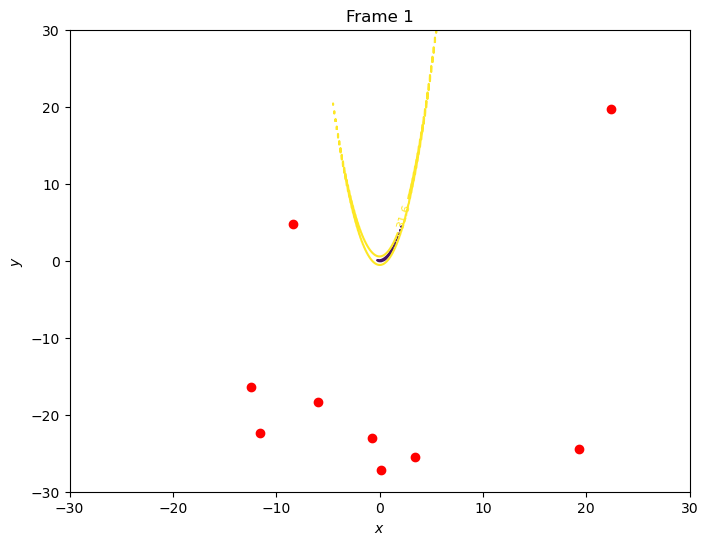

In [103]:
# Crear una malla de puntos en el rango deseado
x = np.linspace(-30, 30, 500)
y = np.linspace(-30, 30, 500)
X, Y = np.meshgrid(x, y)  # Crear la malla 2D

# Calcular la función en cada punto de la malla
Z = rosenbrock((X, Y))

# Inicializar la figura
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar las curvas de nivel de la función de Rosenbrock
contour = ax.contour(X, Y, Z, levels=np.logspace(-10, 1.5, 10), cmap="viridis")
ax.clabel(contour, inline=True, fontsize=8, fmt="%.1f")
ax.set_title("Curvas de nivel de la función de Rosenbrock")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

# Función de actualización para la animación
def update(frame):
    ax.clear()  # Limpiar el gráfico anterior
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    
    # Graficar las curvas de nivel de la función de Rosenbrock
    contour = ax.contour(X, Y, Z, levels=np.logspace(-10, 1.5, 10), cmap="viridis")
    ax.clabel(contour, inline=True, fontsize=8, fmt="%.1f")
    
    # Graficar los puntos de GE
    ax.scatter(PopHist[frame][:, 0], PopHist[frame][:, 1], color='red', label="Puntos")
    
    ax.set_title(f"Frame {frame + 1}")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(PopHist), repeat=True, interval=100)

# Guardar la animación como un archivo GIF
ani.save('simple_animation.gif', writer='imagemagick', fps=10)




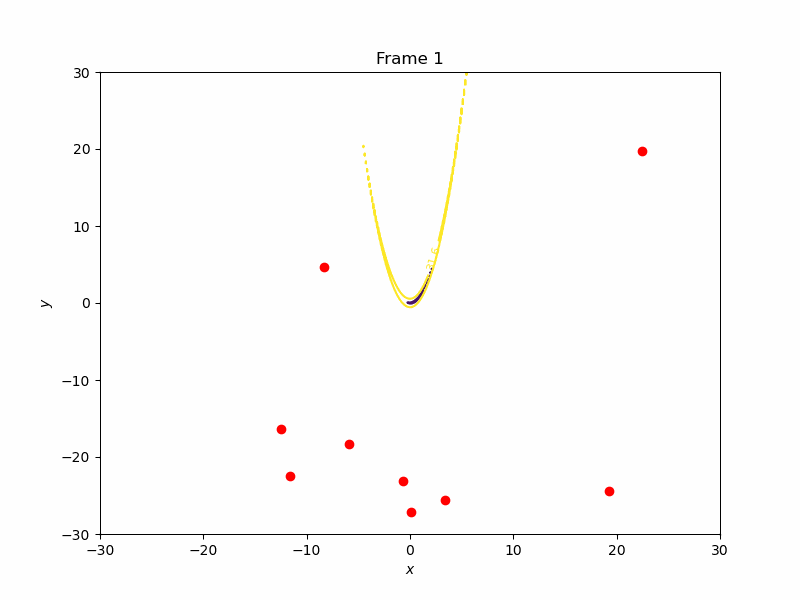

In [104]:
from IPython.display import Image as IPImage
from IPython.display import display

# Mostrar el GIF
display(IPImage(filename='simple_animation.gif'))